In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import pickle as pkl

from collections import OrderedDict

In [3]:
%run utils.ipynb
%run targets.ipynb

In [4]:
file = 'data/ETHBTC_1m_1519496760000_1549568220000.csv'

In [5]:
# Get Data
df = pd.read_csv(file)
df.shape
df.head(10)

(500000, 12)

OPEN_TIME      OPEN      HIGH       LOW     CLOSE  VOLUME  \
0  1519496760000  0.085541  0.085570  0.085407  0.085473  27.714   
1  1519496820000  0.085473  0.085570  0.085448  0.085449  20.128   
2  1519496880000  0.085448  0.085569  0.085400  0.085538  45.510   
3  1519496940000  0.085538  0.085546  0.085402  0.085540  22.231   
4  1519497000000  0.085539  0.085552  0.085464  0.085464  15.243   
5  1519497060000  0.085466  0.085555  0.085464  0.085545  31.895   
6  1519497120000  0.085545  0.085545  0.085464  0.085539  13.325   
7  1519497180000  0.085539  0.085555  0.085414  0.085517  28.202   
8  1519497240000  0.085460  0.085545  0.085419  0.085534  15.302   
9  1519497300000  0.085440  0.085545  0.085440  0.085533  13.730   

      CLOSE_TIME  QUOTE_VOL  NUM_TRADES  TAKE_BASE_VOL  TAKE_QUOTE_VOL  EXTRA  
0  1519496819999   2.370345         192         15.308        1.309733      0  
1  1519496879999   1.720609         122          6.579        0.562654      0  
2  1519496939999   3.890176         209         19.426        1.660960      0  
3  1519496999999   1.900513         105         14.320        1.224483      0  
4  1519497059999   1.303412         117          8.373        0.716219      0  
5  1519497119999   2.727413         131         19.237        1.645547      0  
6  1519497179999   1.139346          78          7.311        0.625352      0  
7  1519497239999   2.411093         195         14.409        1.232346      0  
8  1519497299999   1.307959         134          7.216        0.617035      0  
9  1519497359999   1.173580         105          6.186        0.529001      0

In [6]:
data = df.loc[:, ['OPEN_TIME', 'CLOSE_TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE']]
data.shape
data.head()

(500000, 6)

OPEN_TIME     CLOSE_TIME      OPEN      HIGH       LOW     CLOSE
0  1519496760000  1519496819999  0.085541  0.085570  0.085407  0.085473
1  1519496820000  1519496879999  0.085473  0.085570  0.085448  0.085449
2  1519496880000  1519496939999  0.085448  0.085569  0.085400  0.085538
3  1519496940000  1519496999999  0.085538  0.085546  0.085402  0.085540
4  1519497000000  1519497059999  0.085539  0.085552  0.085464  0.085464

In [7]:
periods = [1, 5, 15, 30, 60, 120, 240, 480, 720, 1440]

In [94]:
period=15

data = interval_transform(data, period=period)
data = data.iloc[:, 1:]
data.shape
data.tail()

target = get_target_1(None, data)
target.shape
target.tail()

data = pd.merge(data, target, on='CLOSE_TIME')
data.shape
data.tail()

data = data.iloc[:]

(33333, 5)

CLOSE_TIME      OPEN      HIGH       LOW     CLOSE
33328  1549564679999  0.030676  0.030697  0.030646  0.030674
33329  1549565579999  0.030675  0.030687  0.030651  0.030668
33330  1549566479999  0.030670  0.031001  0.030636  0.030765
33331  1549567379999  0.030785  0.030786  0.030717  0.030744
33332  1549568279999  0.030736  0.030755  0.030720  0.030736

(33332, 2)

CLOSE_TIME  TARGET
33327  1549563779999     1.0
33328  1549564679999     1.0
33329  1549565579999     0.0
33330  1549566479999     1.0
33331  1549567379999     0.0

(33332, 6)

CLOSE_TIME      OPEN      HIGH       LOW     CLOSE  TARGET
33327  1549563779999  0.030678  0.030685  0.030644  0.030676     1.0
33328  1549564679999  0.030676  0.030697  0.030646  0.030674     1.0
33329  1549565579999  0.030675  0.030687  0.030651  0.030668     0.0
33330  1549566479999  0.030670  0.031001  0.030636  0.030765     1.0
33331  1549567379999  0.030785  0.030786  0.030717  0.030744     0.0

In [95]:
TR_data, CV_data, TT_data = TR_CV_TT_split(data, 0.6, 0.2, 0.2)

TR_data.shape
CV_data.shape
TT_data.shape

(19999, 6)

(6666, 6)

(6667, 6)

In [96]:
TR_data.head()

CLOSE_TIME      OPEN      HIGH       LOW     CLOSE  TARGET
0  1519497959999  0.085466  0.085761  0.085414  0.085733     1.0
1  1519498859999  0.085633  0.085730  0.085406  0.085486     0.0
2  1519499759999  0.085498  0.085700  0.085435  0.085577     1.0
3  1519500659999  0.085650  0.085653  0.085374  0.085451     1.0
4  1519501559999  0.085503  0.085740  0.085433  0.085451     0.0

In [97]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler = scaler.fit(TR_data.iloc[:, 1:-1].values)

TR_data.iloc[:, 1:-1] = scaler.transform(TR_data.iloc[:, 1:-1])
CV_data.iloc[:, 1:-1] = scaler.transform(CV_data.iloc[:, 1:-1])
TT_data.iloc[:, 1:-1] = scaler.transform(TT_data.iloc[:, 1:-1])

In [98]:
TR_data.head()

CLOSE_TIME      OPEN      HIGH       LOW     CLOSE  TARGET
0  1519497959999  1.391463  1.399549  1.399862  1.409134     1.0
1  1519498859999  1.402444  1.397515  1.399335  1.392893     0.0
2  1519499759999  1.393567  1.395545  1.401245  1.398876     1.0
3  1519500659999  1.403562  1.392460  1.397227  1.390592     1.0
4  1519501559999  1.393896  1.398171  1.401113  1.390592     0.0

In [99]:
win=60
TR_X, TR_y = get_multiple_ts_dataset(TR_data.values, tr_win=win, tt_win=0, point_target=True)
CV_X, CV_y = get_multiple_ts_dataset(CV_data.values, tr_win=win, tt_win=0, point_target=True)
TT_X, TT_y = get_multiple_ts_dataset(TT_data.values, tr_win=win, tt_win=0, point_target=True)

TR_X.shape
TR_y.shape
CV_X.shape
CV_y.shape
TT_X.shape
TT_y.shape

(19940, 241)

(19940,)

(6607, 241)

(6607,)

(6608, 241)

(6608,)

In [100]:
from sklearn.linear_model import LogisticRegression

params = {
            'dual'              : False,
            'fit_intercept'     : True,
            'intercept_scaling' : 1,
            'max_iter'          : 100,
            'multi_class'       : 'ovr',
            'class_weight'      : None,
            'random_state'      : 0,
            'verbose'           : 1,
            'warm_start'        : False,
            'n_jobs'            : -1,
            'penalty'           : 'l2',
            'solver'            : 'sag'
        }

params['C'] = 30
params['tol'] = 0.00001

model = LogisticRegression(**params)
model = model.fit(TR_X[:, 1:], TR_y)

TR_y_pred = model.predict_proba(TR_X[:, 1:])[:, 1]
CV_y_pred = model.predict_proba(CV_X[:, 1:])[:, 1]
TT_y_pred = model.predict_proba(TT_X[:, 1:])[:, 1]

TR_metrics = eval_class_metrics(TR_y, TR_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])
CV_metrics = eval_class_metrics(CV_y, CV_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])
TT_metrics = eval_class_metrics(TT_y, TT_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])

res = pd.DataFrame({x:[] for x in ['auc', 'f1', 'acc', 'log_loss']})
res = res.append(pd.Series(TR_metrics, name='TR'))
res = res.append(pd.Series(CV_metrics, name='CV'))
res = res.append(pd.Series(TT_metrics, name='TT'))

print(res)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 5 seconds
         acc       auc        f1   log_loss
TR  0.520612  0.520493  0.509065  16.557665
CV  0.513092  0.503320  0.664301  16.817566
TT  0.510745  0.501916  0.651879  16.898633


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.8s finished


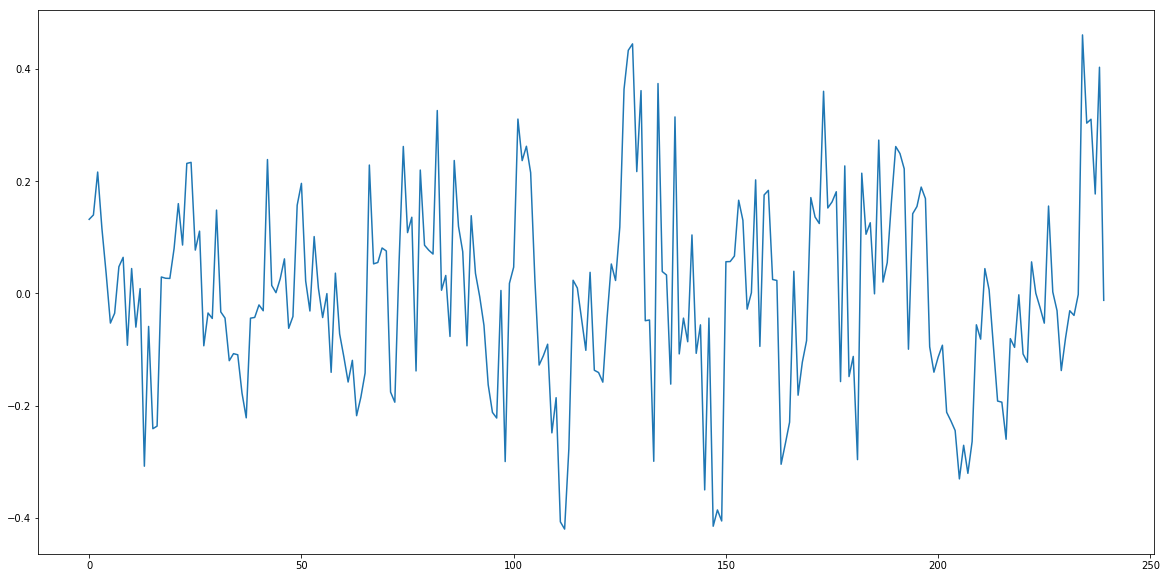

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(model.coef_[0,:])

In [ ]:
TR_y_pred = model.predict(TR_X[:, 1:])
TR_y_pred[:5]

TR_metrics = eval_class_metrics(TR_y, TR_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])
TR_metrics

In [ ]:
(TR_y_pred > 0.5).sum()

In [ ]:
CV_y_pred = model.predict(CV_X[:, 1:])
CV_y_pred[:5]

CV_metrics = eval_class_metrics(CV_y, CV_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])
CV_metrics

In [ ]:
TT_y_pred = model.predict(TT_X[:, 1:])
TT_y_pred[:5]

TT_metrics = eval_class_metrics(TT_y, TT_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])
TT_metrics

In [ ]:
data_tag = '__'.join([str(x)+'_'+str(y) for x, y in {
    'intv':'1m', 
    'cols':'OHCL', 
    'diff':True,
    'rollNorm':False,
    'win':win
}.iteritems()])

proc_tag = '__'.join([str(x)+'_'+str(y) for x, y in {
    'model': 'LRL1',
    'accuracy':'{:.4f}'.format((CV_metrics['acc']+TT_metrics['acc'])/2)
}.iteritems()])

import time
time_tag = time.strftime('%y%m%d_%H%M%S')

big_tag = time_tag+'_|_'+data_tag+'_|_'+proc_tag

f = open('models/'+time_tag+'.pkl', 'wb')
pkl.dump(model, f, -1)
f.close()

%notebook -e models/{big_tag}.ipynb